In [3]:
#pip install pytorch

In [4]:
#pip install tensorflow

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
fraud = pd.read_csv('C:/Users/user/Desktop/math/ML/final exam/archive (2)/creditcard.csv')
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


we have a very lag data set. and we have to detect fraud activities repesented under Class = 1 and class = 0 for not fraud.

We shall now clean our and examin how many fraud cases we shall be left with

no missing values

In [7]:
fraud.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
fraud.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

we have some duplicated values

In [9]:
fraud.duplicated().sum()

1081

In [10]:
fraud22 = fraud.drop_duplicates()

In [11]:
fraud22.shape

(283726, 31)

In [12]:
fraud22.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [13]:
print("Fraud cases ")
print(fraud.Time[fraud.Class == 1].describe())

Fraud cases 
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64


In [14]:
print("Normal cases ")
print(fraud.Time[fraud.Class == 0].describe())

Normal cases 
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


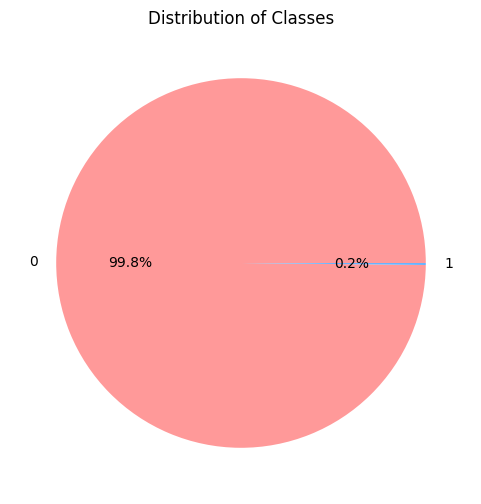

In [15]:
class_counts = fraud['Class'].value_counts()

#a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Distribution of Classes')
plt.show()

In [16]:
continuous = ['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
correlation= fraud22[continuous].corr()
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


<function matplotlib.pyplot.show(close=None, block=None)>

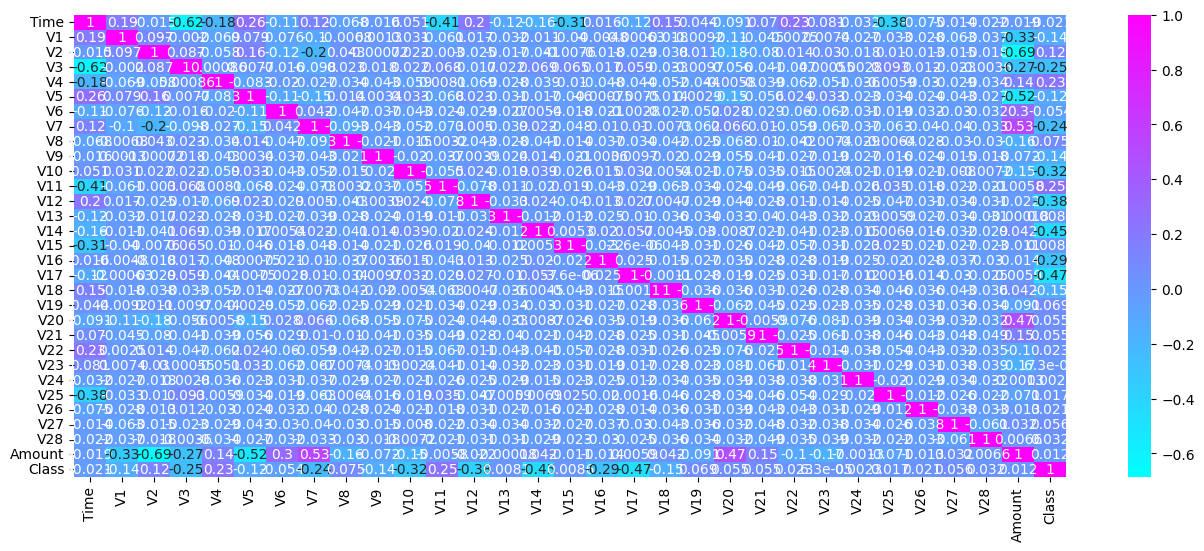

In [17]:
plt.figure(figsize=(16,6))
sns.heatmap(correlation.corr(), annot=True ,cmap="cool" )
plt.show

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>],
       [<Axes: title={'center': 'V5'}>, <Axes: title={'center': 'V6'}>,
        <Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>,
        <Axes: title={'center': 'V9'}>],
       [<Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>,
        <Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>],
       [<Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V16'}>,
        <Axes: title={'center': 'V17'}>, <Axes: title={'center': 'V18'}>,
        <Axes: title={'center': 'V19'}>],
       [<Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>,
        <Axes: title={'center': 'V24'}>],
       [<Axes: title={'center': 'V25'}>, <Axes: title={'ce

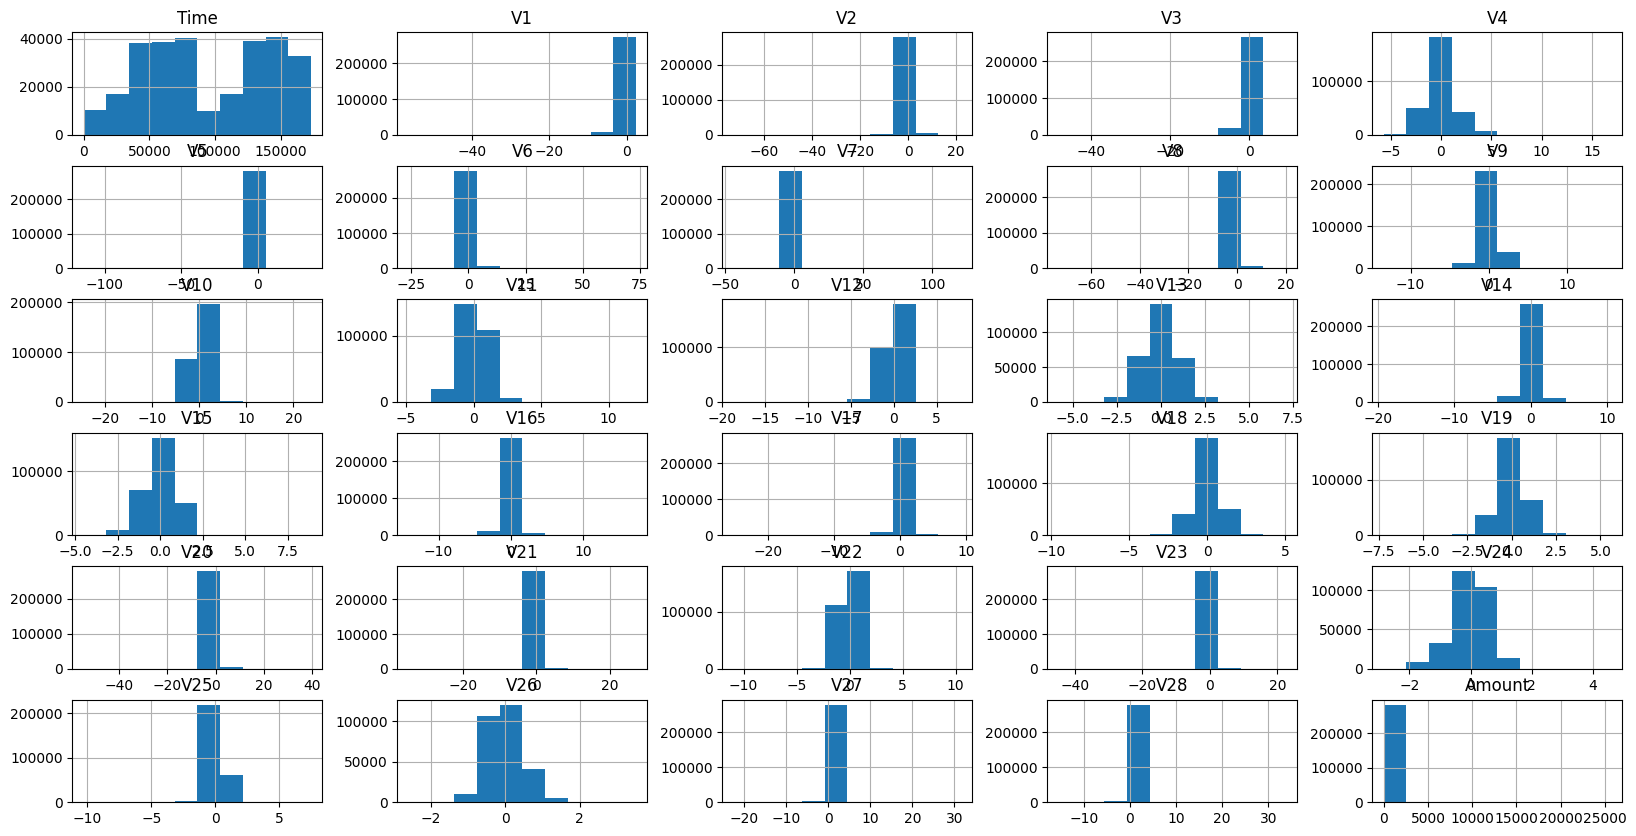

In [18]:
fraud22.hist(['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount'],figsize=(20,10))

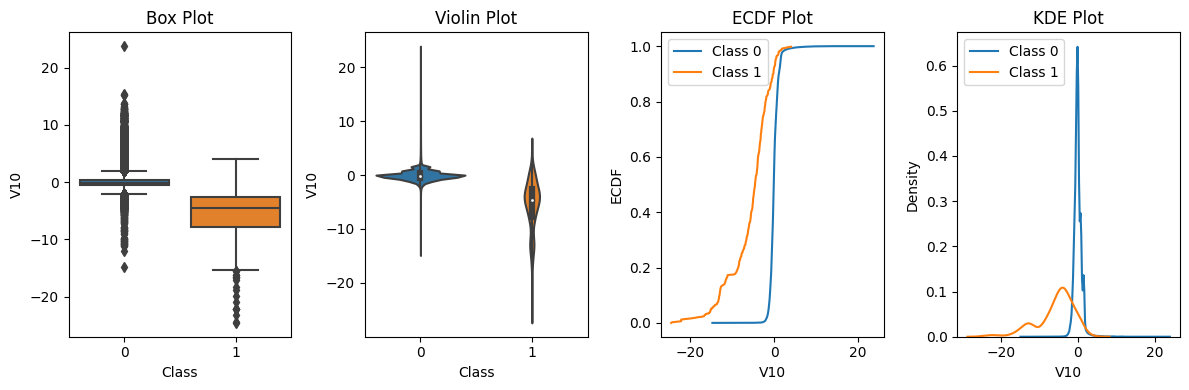

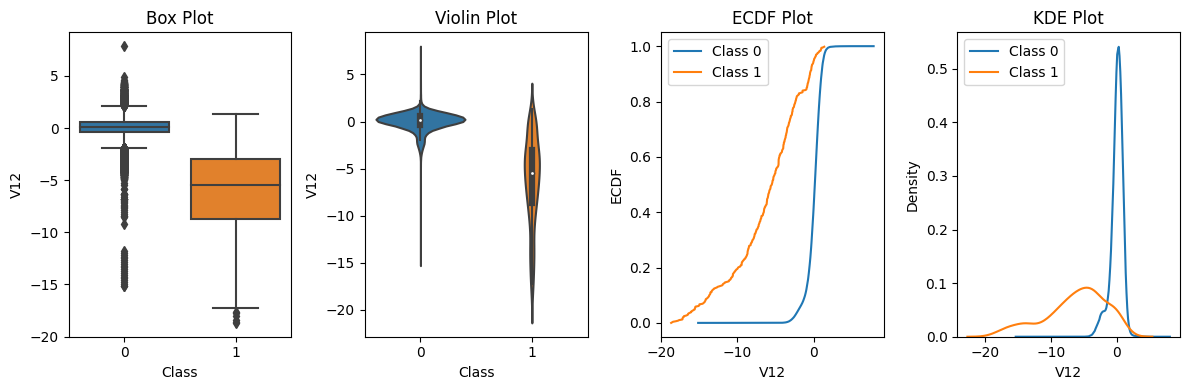

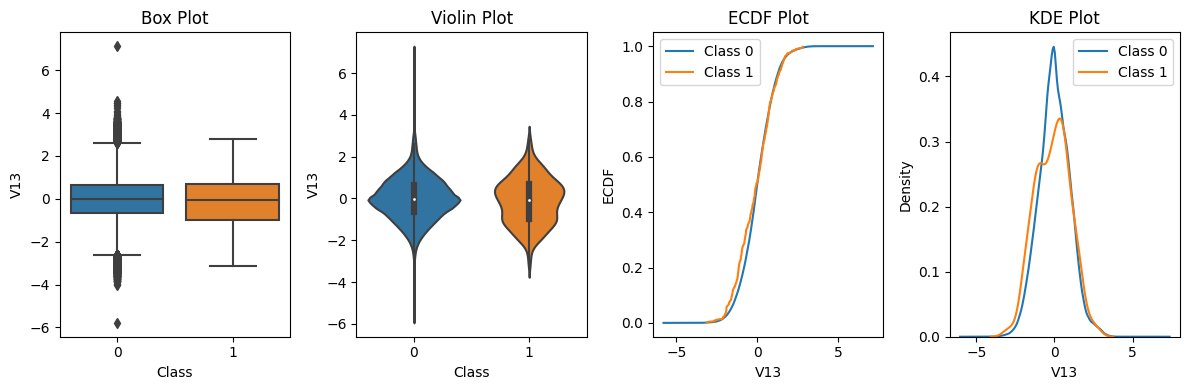

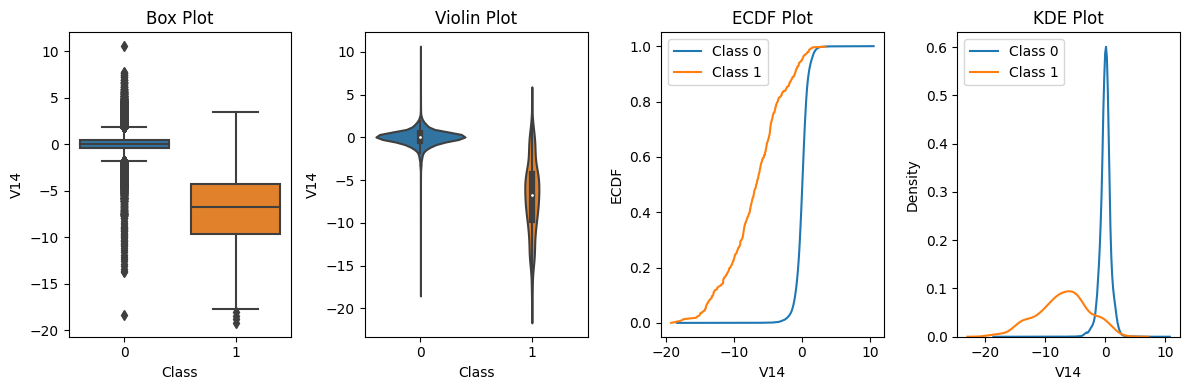

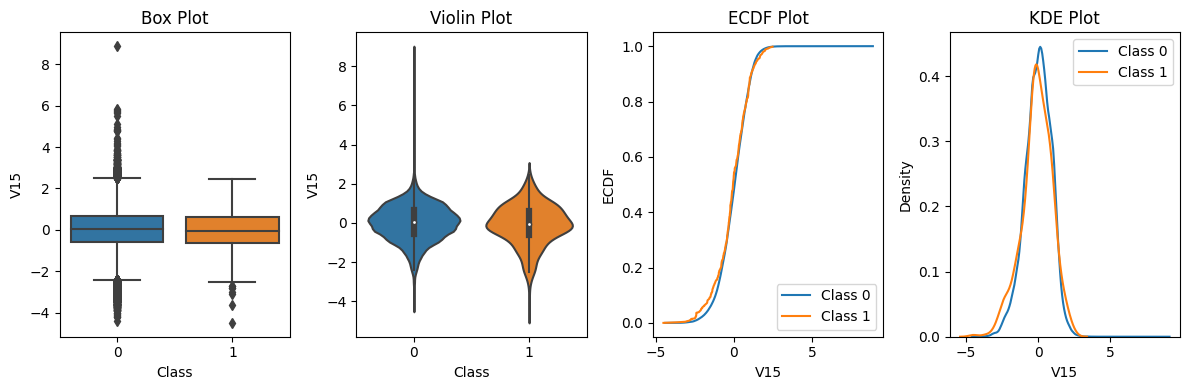

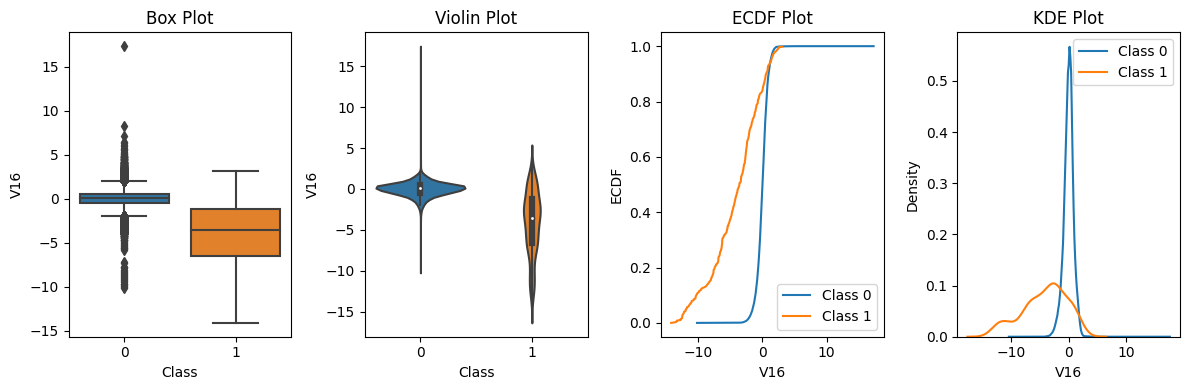

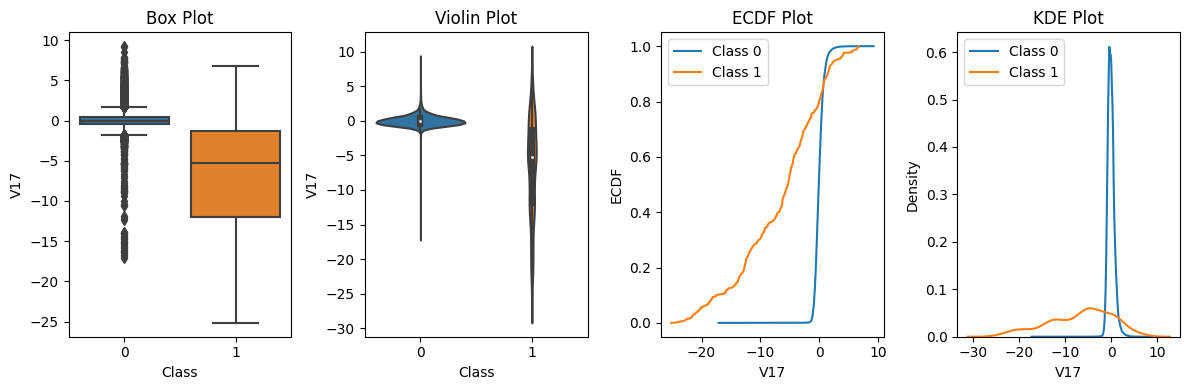

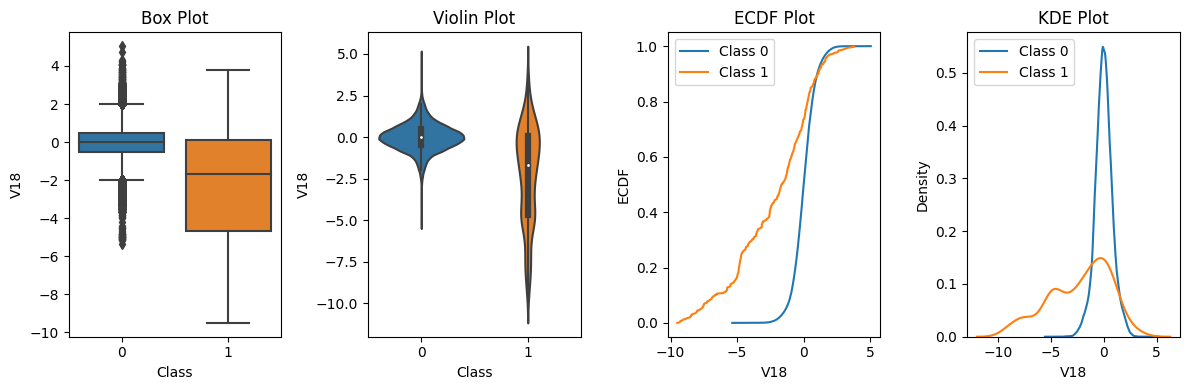

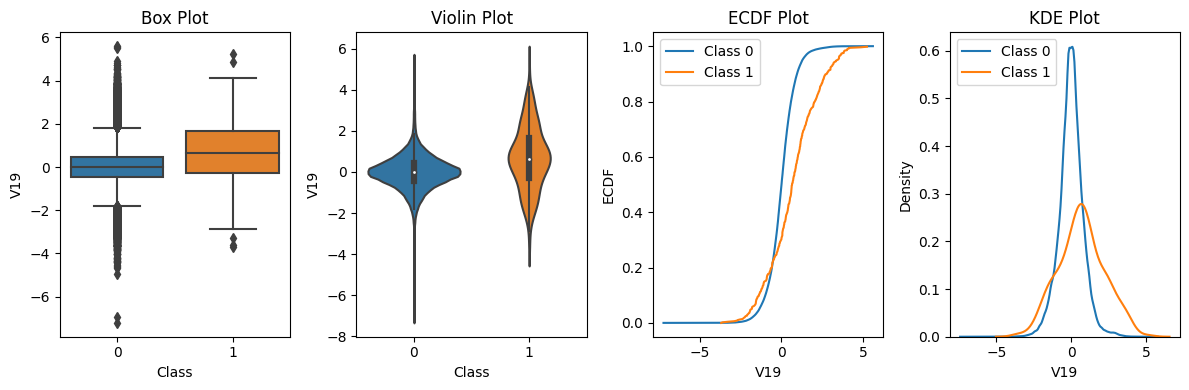

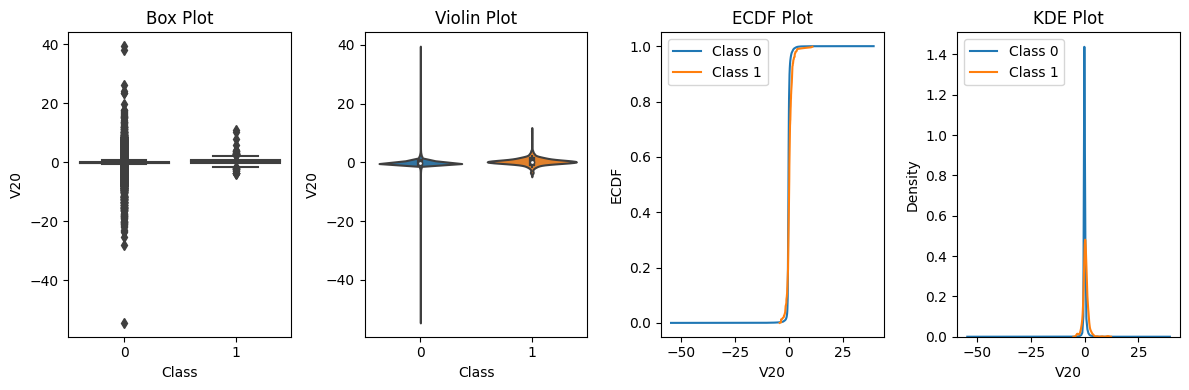

In [19]:
import numpy as np
# List of variables to compare
variables_to_compare = ['V10', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20']

# Iterate through each variable and create visualizations
for variable in variables_to_compare:
    plt.figure(figsize=(12, 4))
    
    # Box Plot
    plt.subplot(1, 4, 1)
    sns.boxplot(x='Class', y=variable, data=fraud)
    plt.xlabel('Class')
    plt.ylabel(variable)
    plt.title('Box Plot')
    
    # Violin Plot
    plt.subplot(1, 4, 2)
    sns.violinplot(x='Class', y=variable, data=fraud)
    plt.xlabel('Class')
    plt.ylabel(variable)
    plt.title('Violin Plot')
    
    # ECDF Plot
    plt.subplot(1, 4, 3)
    for class_label in [0, 1]:
        data_class = fraud[fraud['Class'] == class_label][variable]
        plt.plot(np.sort(data_class), np.linspace(0, 1, len(data_class), endpoint=False), label=f'Class {class_label}')
    plt.xlabel(variable)
    plt.ylabel('ECDF')
    plt.title('ECDF Plot')
    plt.legend()
    
    # KDE Plot
    plt.subplot(1, 4, 4)
    for class_label in [0, 1]:
        data_class = fraud[fraud['Class'] == class_label][variable]
        sns.kdeplot(data_class, label=f'Class {class_label}')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.title('KDE Plot')
    plt.legend()
    
    plt.tight_layout()
    plt.show()



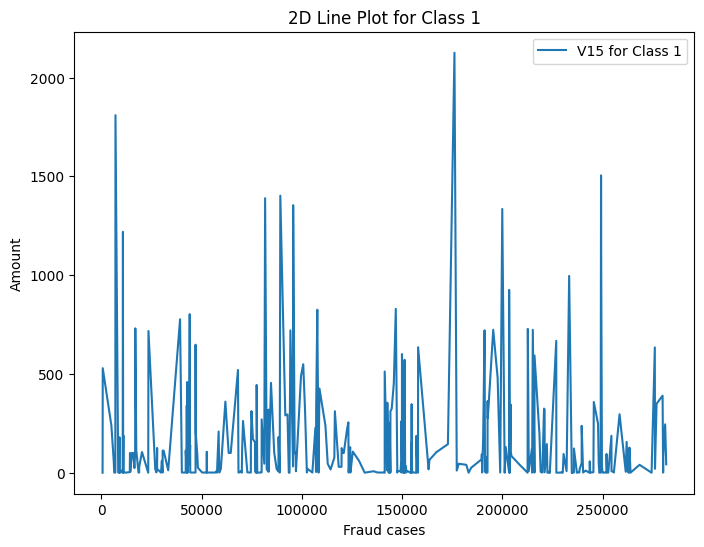

In [20]:
class_1_data = fraud22[fraud22['Class'] == 1]
plt.figure(figsize=(8, 6))
plt.plot(class_1_data['Amount'], label='V15 for Class 1')
plt.xlabel('Fraud cases')
plt.ylabel('Amount')
plt.title('2D Line Plot for Class 1')
plt.legend()
plt.show()


 algorithms are inherently capable of handling imbalanced data are  Random Forest, XGBoost, and LightGBM

In [21]:
#pip install lightgbm

In [22]:
#pip install imblearn

In [23]:
#pip install xgboost -i https://pypi.python.org/simple/


SMOTE is used from the imblearn library to oversample the minority class in the training data.

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Extract features (X) and target variable (y)
X = fraud22[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = fraud22['Class']

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [25]:
X_train.shape

(226980, 30)

In [26]:
y_train.shape

(226980,)

In [27]:
X_test.shape

(56746, 30)

In [28]:
y_test.shape

(56746,)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions
rf_predictions = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.95      0.79      0.86        90

    accuracy                           1.00     56746
   macro avg       0.97      0.89      0.93     56746
weighted avg       1.00      1.00      1.00     56746



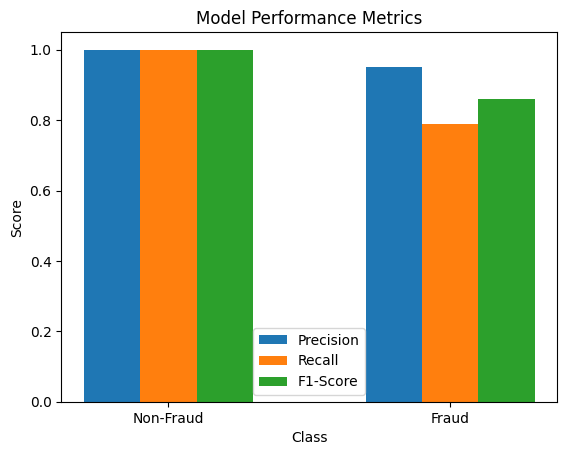

In [30]:
import matplotlib.pyplot as plt

# Precision, Recall, and F1-score values for fraud and non-fraud classes
precision = [1.00, 0.95]
recall = [1.00, 0.79]
f1_score = [1.00, 0.86]

# Class labels
classes = ['Non-Fraud', 'Fraud']

# Create a bar plot
x = range(len(classes))
plt.bar(x, precision, width=0.2, label='Precision')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall')
plt.bar([p + 0.4 for p in x], f1_score, width=0.2, label='F1-Score')

plt.xlabel('Class')
plt.xticks([p + 0.2 for p in x], classes)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()


In [31]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_resampled, y_train_resampled)
xgb_predictions = xgb_classifier.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.85      0.80      0.82        90

    accuracy                           1.00     56746
   macro avg       0.92      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746



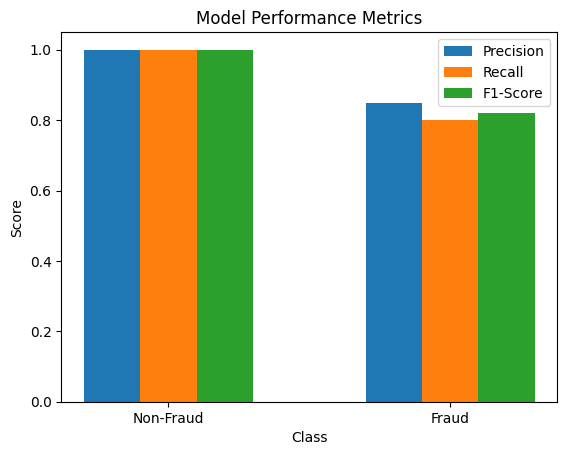

In [32]:
precision = [1.00, 0.85]
recall = [1.00, 0.80]
f1_score = [1.00, 0.82]

classes = ['Non-Fraud', 'Fraud']
x = range(len(classes))
plt.bar(x, precision, width=0.2, label='Precision')
plt.bar([p + 0.2 for p in x], recall, width=0.2, label='Recall')
plt.bar([p + 0.4 for p in x], f1_score, width=0.2, label='F1-Score')

plt.xlabel('Class')
plt.xticks([p + 0.2 for p in x], classes)
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.legend()
plt.show()

A confusion matrix provides a detailed breakdown the model's performance. It shows the true positive, true negative, false positive, and false negative values, which can be used to calculate various metrics such as accuracy, precision, recall, and F1-score.

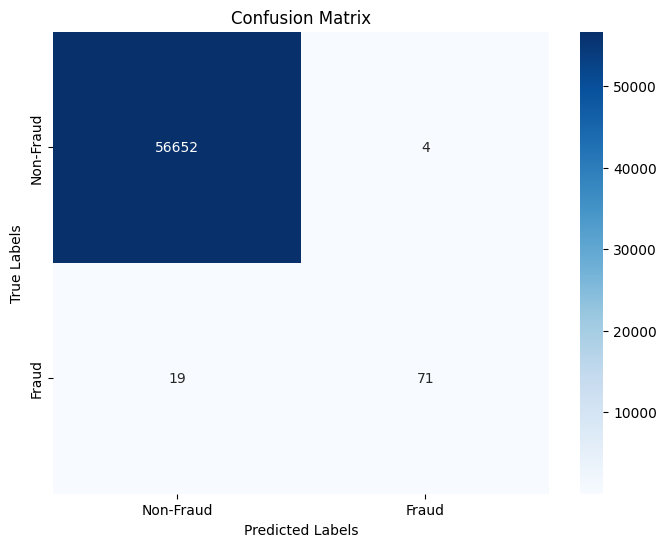

In [33]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [34]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(x_train, y_train)
clf.score(x_test, y_test)

0.9985725866140345

In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = clf.predict(x_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Precision:  0.6451612903225806
Recall:  0.2222222222222222
F1-score:  0.3305785123966942


ROC curves visualize the trade-off between true positive rate and false positive rate at various classification thresholds. AUC (Area Under the Curve) summarizes the ROC curve and provides a single score representing the model's overall performance.

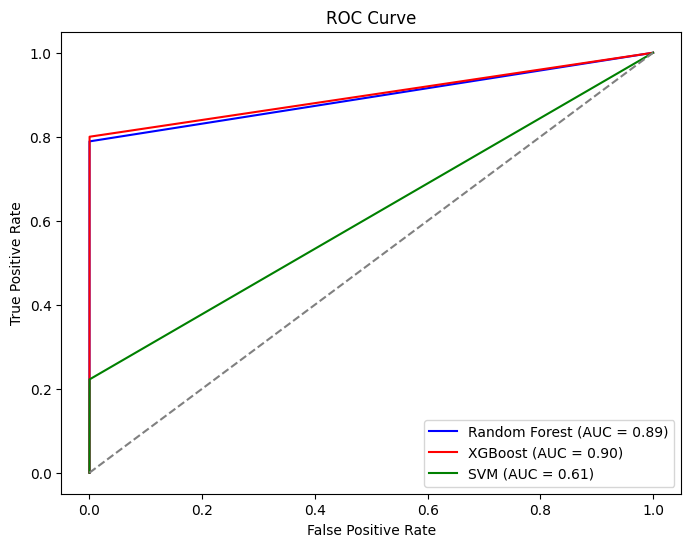

In [36]:
from sklearn.metrics import roc_curve, auc
svm_predictions = clf.predict(x_test)

# Calculate ROC curve and AUC for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_predictions)
svm_auc = auc(svm_fpr, svm_tpr)
#Calculate ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions)
rf_auc = auc(rf_fpr, rf_tpr)
# Calculate ROC curve and AUC for XGBoost
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_predictions)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curves for all three classifiers
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='red', label='XGBoost (AUC = {:.2f})'.format(xgb_auc))
plt.plot(svm_fpr, svm_tpr, color='green', label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



In [37]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train_resampled, y_train_resampled)
lgb_predictions = lgb_classifier.predict(X_test)

# Evaluate the model
print("LightGBM Classification Report:")
print(classification_report(y_test, lgb_predictions))

[LightGBM] [Info] Number of positive: 226597, number of negative: 226597
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.060666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 453194, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.65      0.78      0.71        90

    accuracy                           1.00     56746
   macro avg       0.82      0.89      0.85     56746
weighted avg       1.00      1.00      1.00     56746



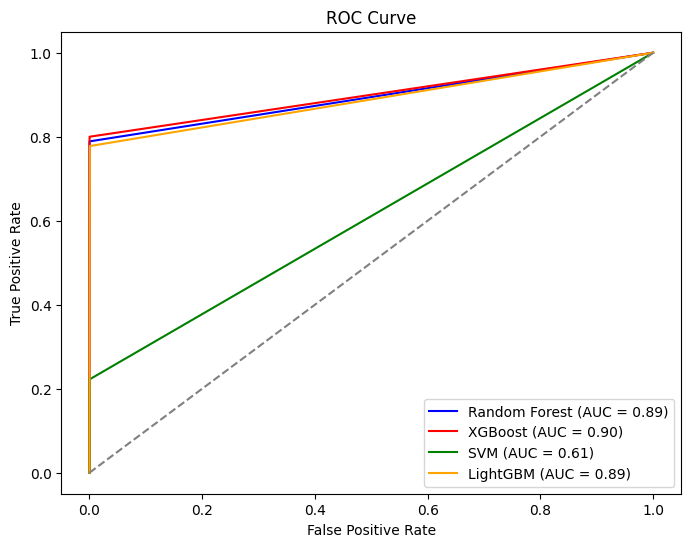

In [38]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve and AUC for LightGBM
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_predictions)
lgb_auc = auc(lgb_fpr, lgb_tpr)

# Plot ROC curves for all four classifiers
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(xgb_fpr, xgb_tpr, color='red', label='XGBoost (AUC = {:.2f})'.format(xgb_auc))
plt.plot(svm_fpr, svm_tpr, color='green', label='SVM (AUC = {:.2f})'.format(svm_auc))
plt.plot(lgb_fpr, lgb_tpr, color='orange', label='LightGBM (AUC = {:.2f})'.format(lgb_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [39]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(X)

In [40]:
xgb_predictions = xgb_classifier.predict(X)

In [41]:
from sklearn.manifold import TSNE
import numpy as np

# Combine the original data and XGBoost predictions
data_with_predictions = np.hstack((X, xgb_predictions.reshape(-1, 1)))
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(data_with_predictions)

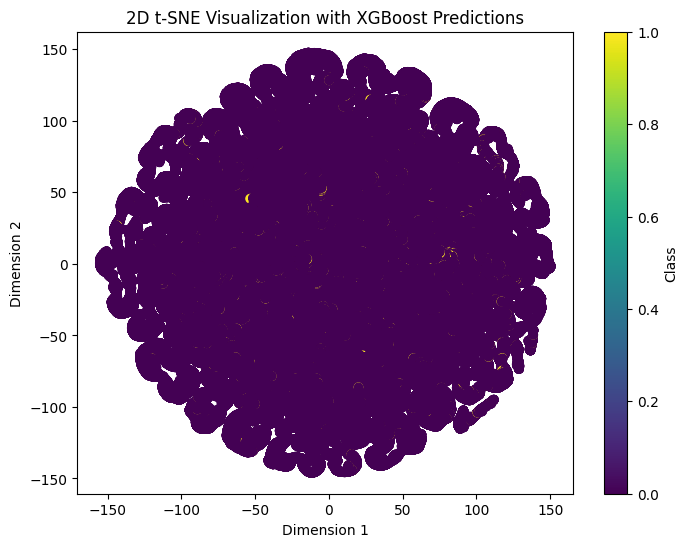

In [42]:
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis')  # y is your true labels
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D t-SNE Visualization with XGBoost Predictions')
plt.colorbar(label='Class')
plt.show()

In [43]:
#pip install joblib

In [44]:
import joblib
# Save the best trained XGBoost model
joblib.dump(xgb_classifier, 'best_fraud_detection_model.pkl')


['best_fraud_detection_model.pkl']